In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
# posterior parameters for control group
alpha_post = 58
beta_post = 65

# data for control group
patients = np.array([15, 18, 10, 39, 29, 10])
improved = np.array([9, 11, 4, 21, 12, 0])

In [3]:
distr = sts.beta(alpha_post, beta_post)
p = distr.rvs(10000)

We can first try modeling the number of successes. This will give us a picture of how biasedness changes for each dataset. Ideally, the mode of the binomial distribution should be close enough to the study results, assuming that each trial is i.i.d. (RCT).

In [7]:
def test_stat_1(trial_success): # number of successes
    return trial_success

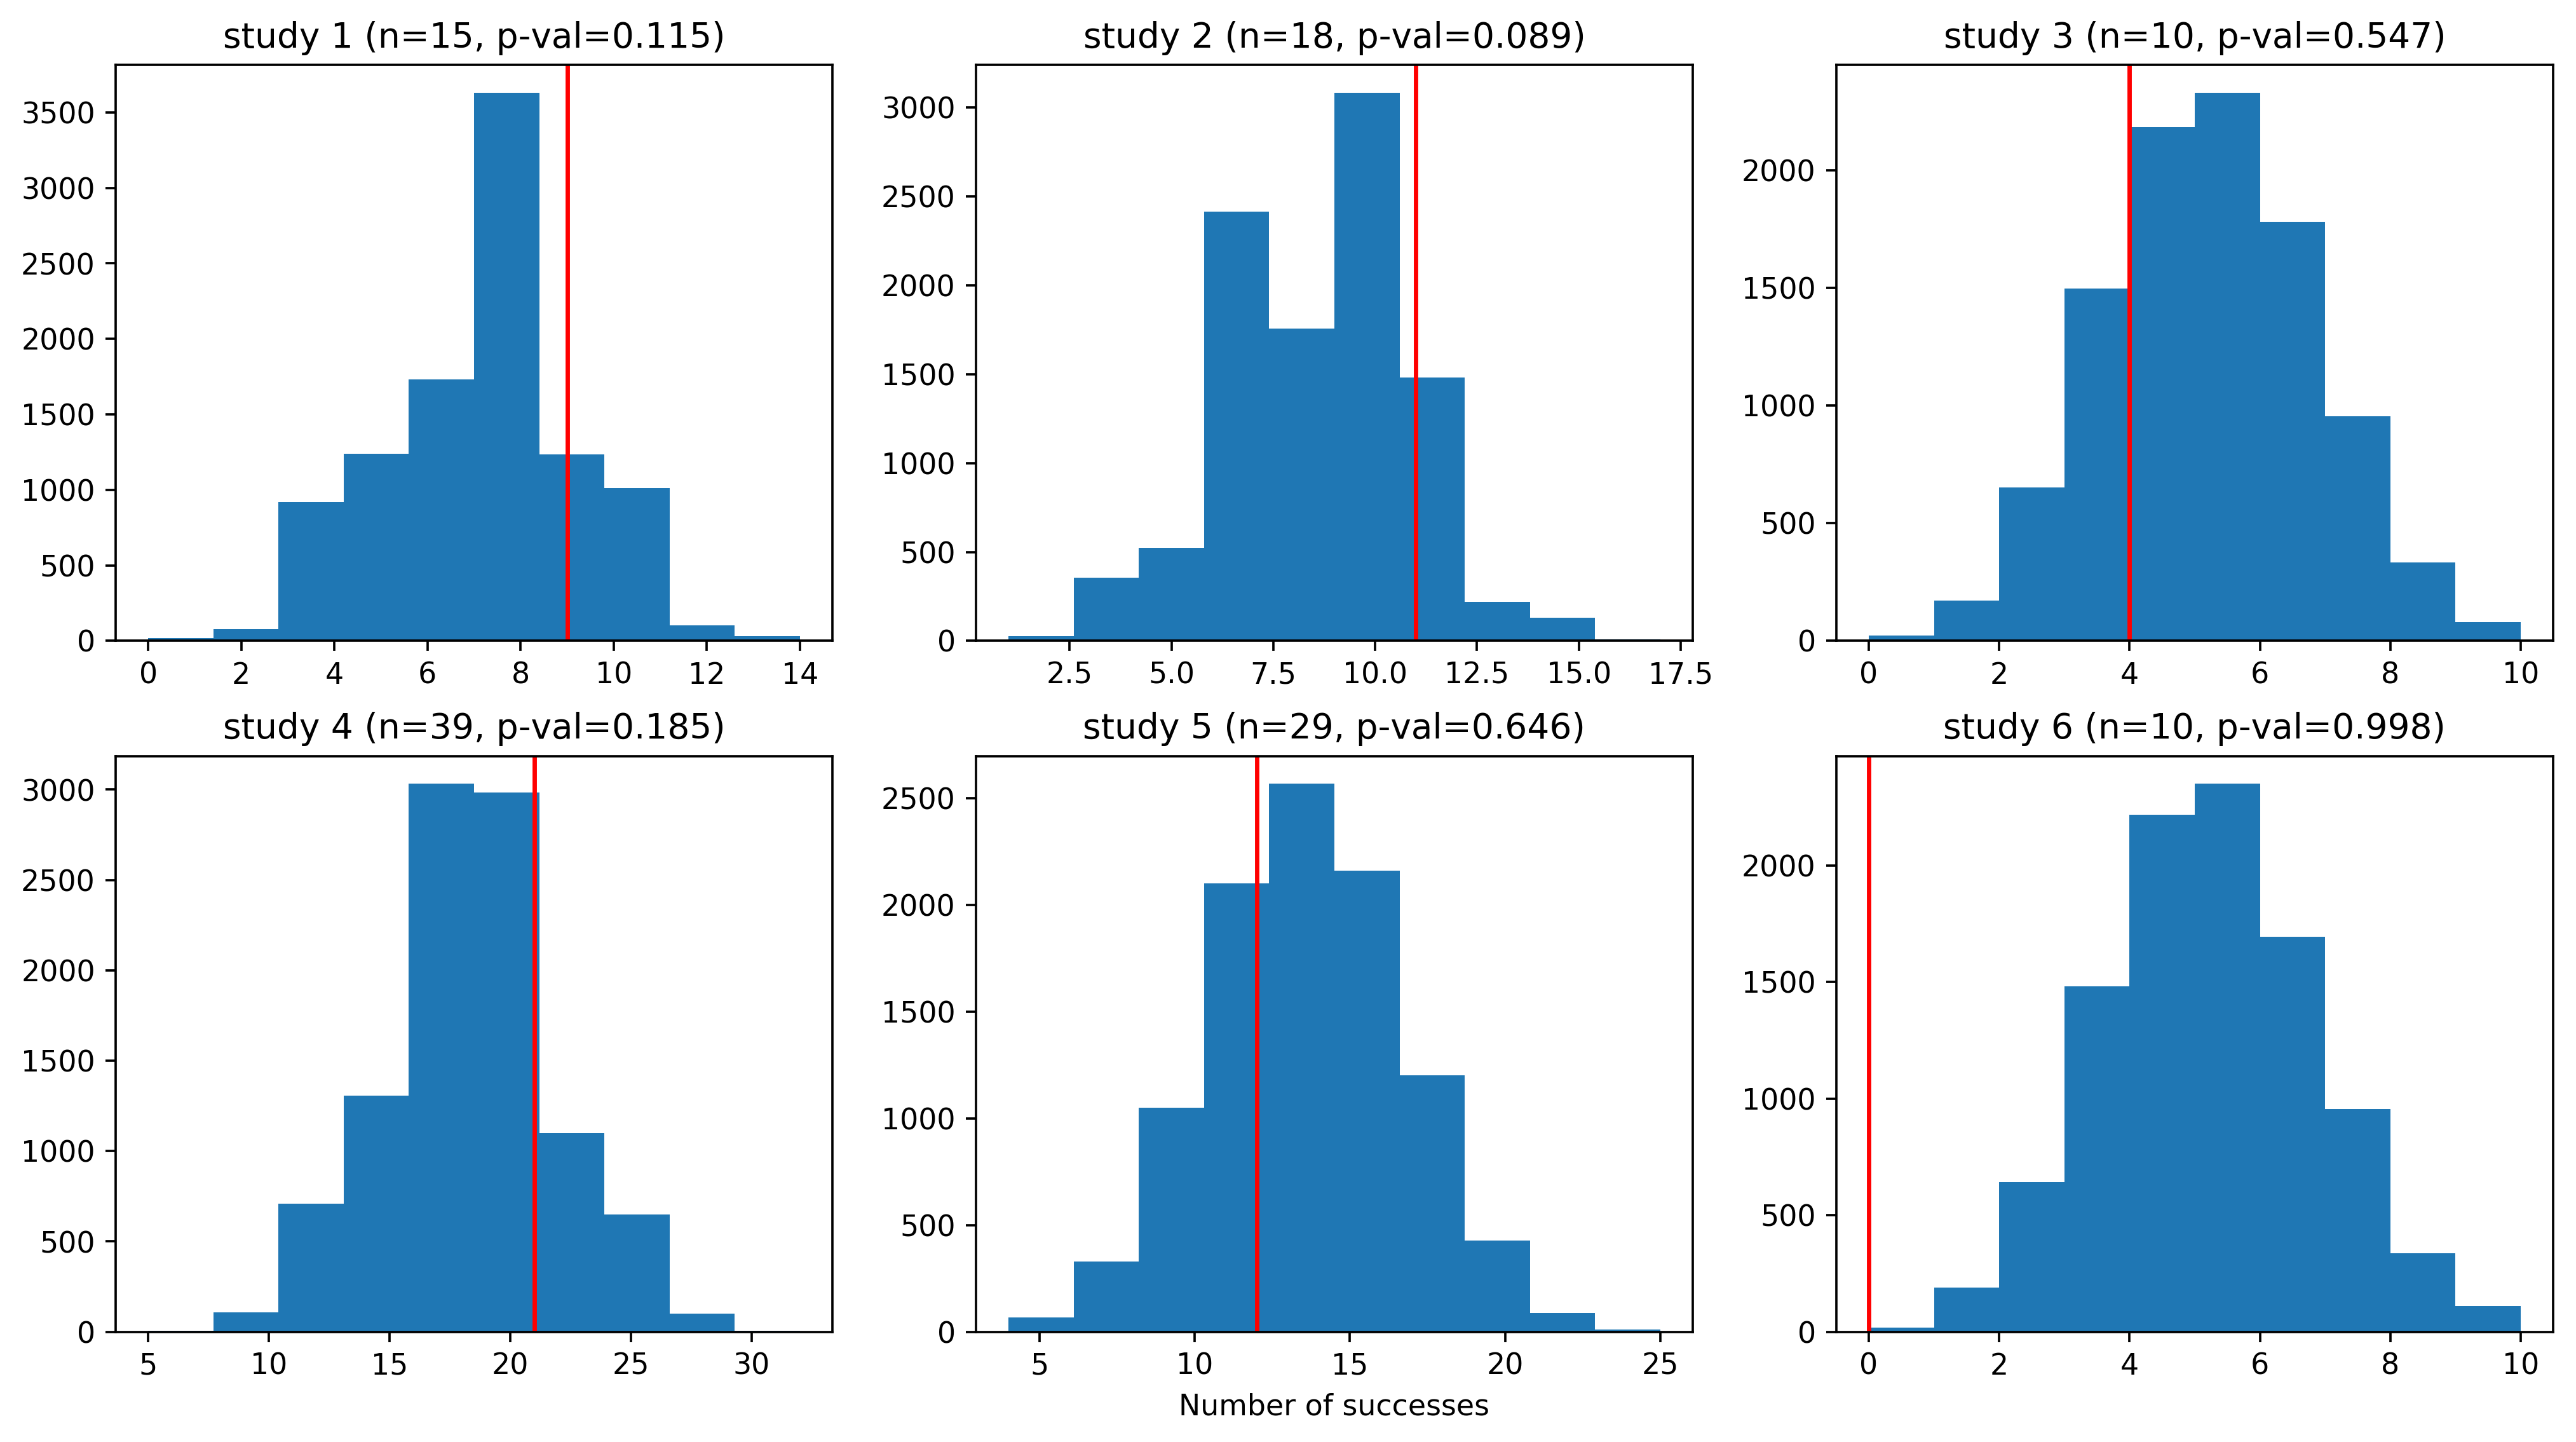

In [8]:
plt.figure(figsize=(15, 8), dpi=330)
for i in range(len(patients)):
    samples = sts.binom.rvs(n=patients[i], p=p)
    p_val = np.sum(test_stat_1(samples) > test_stat_1(improved[i])) / len(samples)
    
    plt.subplot(2, len(patients) // 2, i + 1)
    plt.title('study {0} (n={1}, p-val={2})'.format(i + 1, patients[i], np.round(p_val, 3)))
    plt.hist(samples, bins=10)
    plt.axvline(improved[i], color="red")
    
    if i + 1 == 5:
        plt.xlabel('Number of successes')

plt.show()

As we can see, study 6 looks pretty bad, and all other studies (except for study 3) are quite off from the median. Study 6 indicates that at least it should be modeled with a different set of hyperparameters.

Let's now try to collect the median of resulting binomial distributions and see how do those compare to the actual outcome.

In [9]:
def test_stat_2(binomial_dist): # median of successes
    return np.median(binomial_dist)

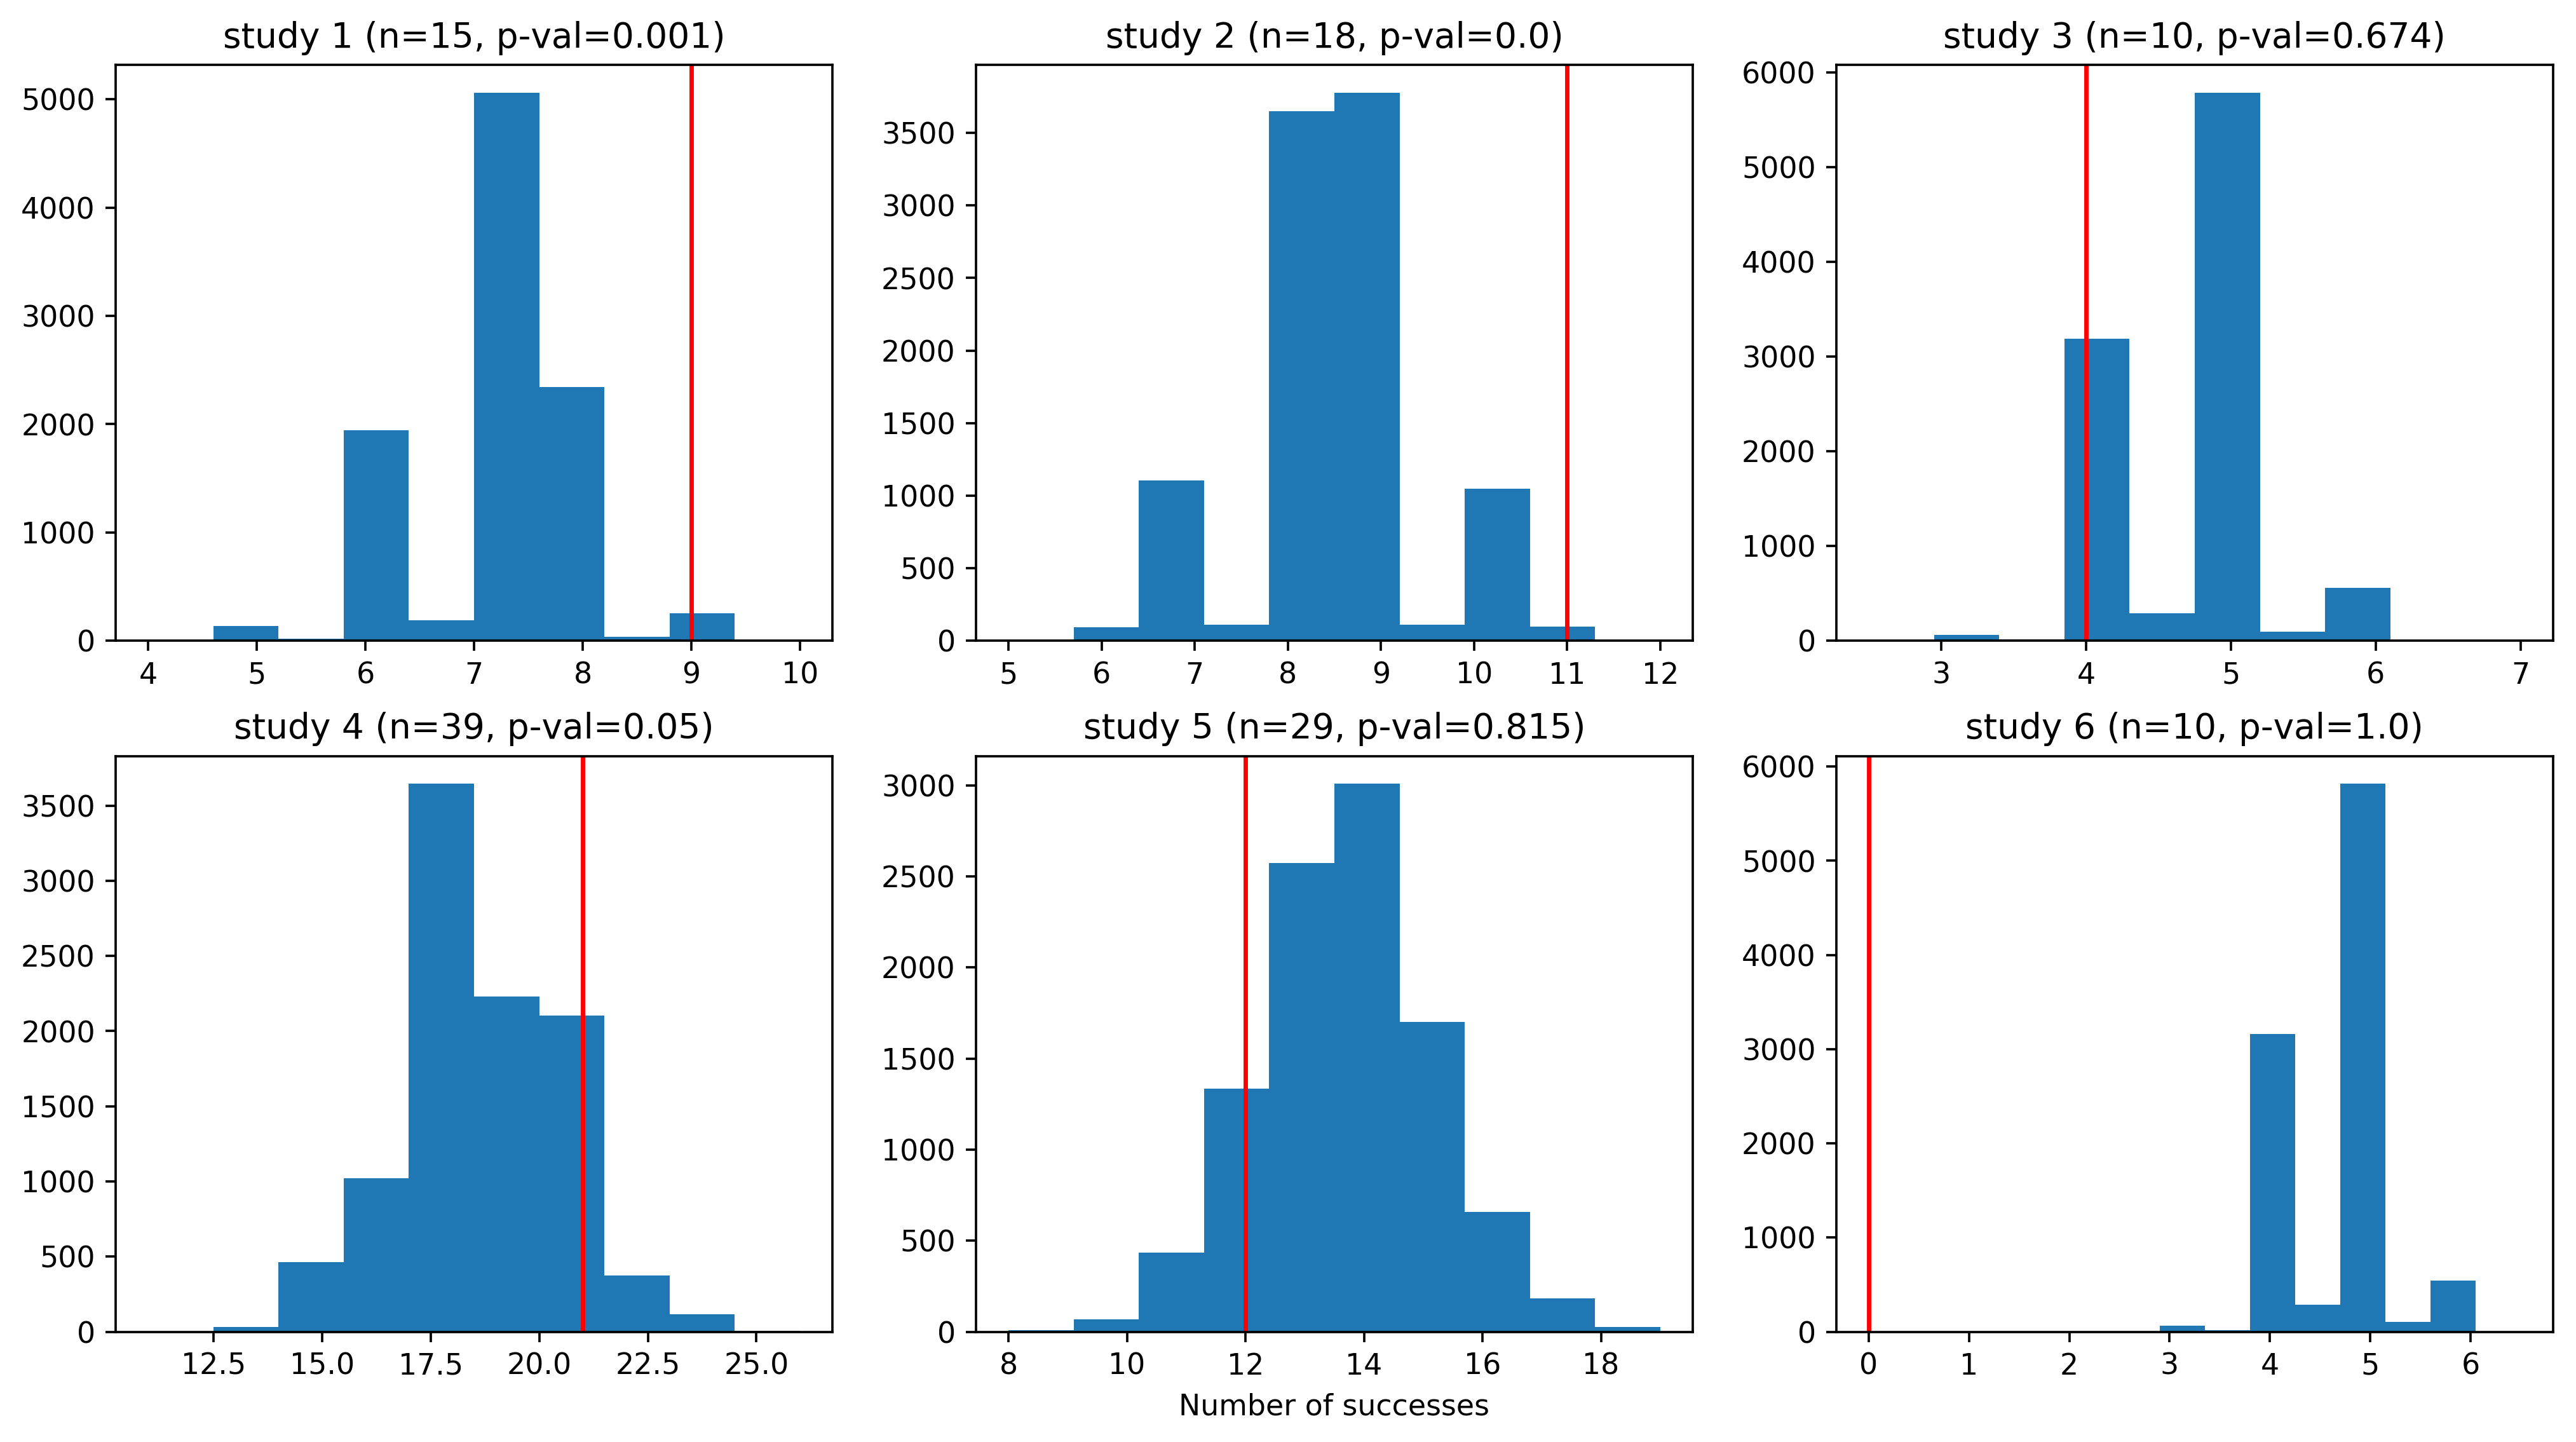

In [10]:
plt.figure(figsize=(15, 8), dpi=330)
for i in range(len(patients)):
    median_store = []
    for prob in p:
        samples = sts.binom.rvs(n=patients[i], p=prob, size=100)
        med = test_stat_2(samples)
        median_store.append(med)
    
    p_val = np.sum(median_store > improved[i]) / len(median_store)
    
    plt.subplot(2, len(patients) // 2, i + 1)
    plt.title('study {0} (n={1}, p-val={2})'.format(i + 1, patients[i], np.round(p_val, 3)))
    plt.hist(median_store, bins=10)
    plt.axvline(improved[i], color="red")
    
    if i + 1 == 5:
        plt.xlabel('Number of successes')

plt.show()

Most of the studies them are very off, great! We need separate hyperparameters (hierarchichal model then).